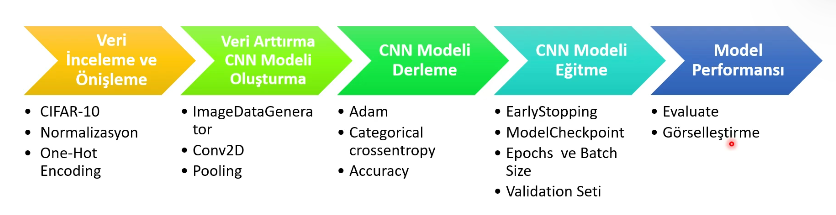
# import libraries

In [1]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Conv2D ,MaxPooling2D,Flatten,Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from sklearn.metrics import classification_report

import warnings 
warnings.filterwarnings("ignore")

In [9]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

# data preprocessing

In [10]:
x_train.shape # 50000 görsel 32*32 size 3 channel ( rgb )

(50000, 32, 32, 3)

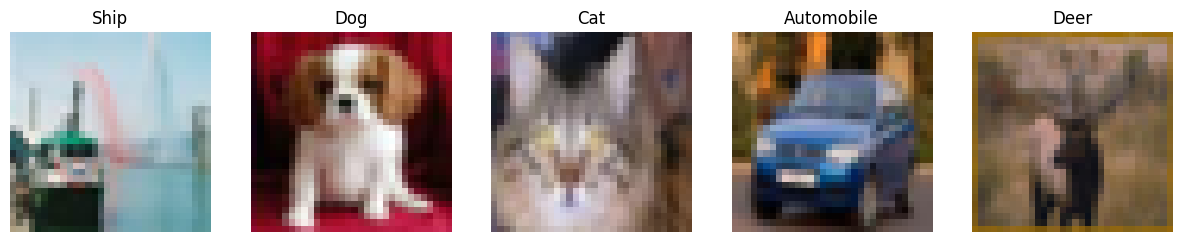

In [15]:
# gorsellestirme
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]

fig,axes=plt.subplots(1,5,figsize=(15,10))

for i,idx in enumerate(np.random.randint(1,len(x_train),size=5)):
    axes[i].imshow(x_train[idx])
    label=class_labels[int(y_train[idx])]
    axes[i].set_title(label)
    axes[i].axis("off")

plt.show()

In [16]:
x_train=x_train.astype("float32")/255
x_test=x_test.astype("float32")/255

In [17]:
y_train=to_categorical(y_train,10) # 10 class old için 10
y_test=to_categorical(y_test,10) # 10 class old için 10

In [18]:
y_train.shape # one hot coding başarılı şekilde yapıldı

(50000, 10)

# Data Augmentation

In [20]:
datagenerator=ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)
datagenerator.fit(x_train)  # data augment eğitim verilerileri üzerinde gerçekletirildi

# Cnn Create Model and Training

In [25]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding="same",activation="relu",input_shape=(32,32,3)))
model.add(Conv2D(32,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.24))

model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(Conv2D(64,(3,3),padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.24))

model.add(Flatten())
model.add(Dense(512,activation="relu"))
model.add(Dropout(0.24))
model.add(Dense(10,activation="softmax"))
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4096)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │     2,097,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,168,362 (8.27 MB)

 Trainable params: 2,168,362 (8.27 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
model.compile(optimizer=RMSprop(learning_rate=0.0001,decay=1e-6),loss="categorical_crossentropy",metrics=["accuracy"])

In [31]:
history=model.fit(datagenerator.flow(x_train,y_train,batch_size=512),
          epochs=50,validation_data=(x_test,y_test))

Epoch 1/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 495ms/step - accuracy: 0.5212 - loss: 1.3346 - val_accuracy: 0.5483 - val_loss: 1.2504
Epoch 2/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 453ms/step - accuracy: 0.5256 - loss: 1.3231 - val_accuracy: 0.5779 - val_loss: 1.1697
Epoch 3/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 425ms/step - accuracy: 0.5195 - loss: 1.3306 - val_accuracy: 0.5696 - val_loss: 1.2146
Epoch 4/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - accuracy: 0.5228 - loss: 1.3278 - val_accuracy: 0.5526 - val_loss: 1.2501
Epoch 5/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 47s 474ms/step - accuracy: 0.5346 - loss: 1.3072 - val_accuracy: 0.5698 - val_loss: 1.1849
Epoch 6/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 45s 459ms/step - accuracy: 0.5331 - loss: 1.3044 - val_accuracy: 0.5603 - val_loss: 1.2362
Epoch 7/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 49s 496ms/step - accuracy: 0.5372 - loss: 1.2931 - val_accuracy: 0.5882 - val_loss: 1.1417
Epoch 8/50
98/98 ━━━━━━━━━━━━━━━━━━━━ 42s 426ms/step - accuracy: 0.5373 - loss: 1.2929 - val_accu

# Model Evaluation

In [32]:
y_pred=model.predict(x_test)

y_pred_class=np.argmax(y_pred,axis=1)  # argumanların maxını aldı 

y_true=np.argmax(y_test,axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step


In [33]:
report=classification_report(y_true,y_pred_class,target_names=class_labels)
print(report)

              precision    recall  f1-score   support

    Airplane       0.77      0.68      0.72      1000
  Automobile       0.69      0.81      0.74      1000
        Bird       0.83      0.30      0.44      1000
         Cat       0.60      0.26      0.36      1000
        Deer       0.67      0.42      0.51      1000
         Dog       0.62      0.47      0.54      1000
        Frog       0.42      0.94      0.59      1000
       Horse       0.64      0.77      0.70      1000
        Ship       0.81      0.74      0.77      1000
       Truck       0.59      0.85      0.70      1000

    accuracy                           0.62     10000
   macro avg       0.66      0.62      0.61     10000
weighted avg       0.66      0.62      0.61     10000



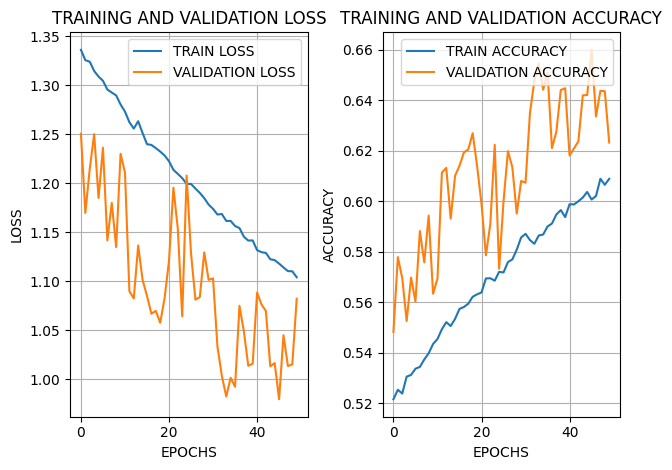

In [34]:
plt.figure()

plt.subplot(1,2,1)
plt.plot(history.history["loss"],label="TRAIN LOSS")
plt.plot(history.history["val_loss"],label="VALIDATION LOSS")
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.title("TRAINING AND VALIDATION LOSS")
plt.legend()
plt.grid()

plt.subplot(1,2,2)
plt.plot(history.history["accuracy"],label="TRAIN ACCURACY")
plt.plot(history.history["val_accuracy"],label="VALIDATION ACCURACY")
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.title("TRAINING AND VALIDATION ACCURACY")

plt.legend()
plt.grid()
plt.tight_layout()
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


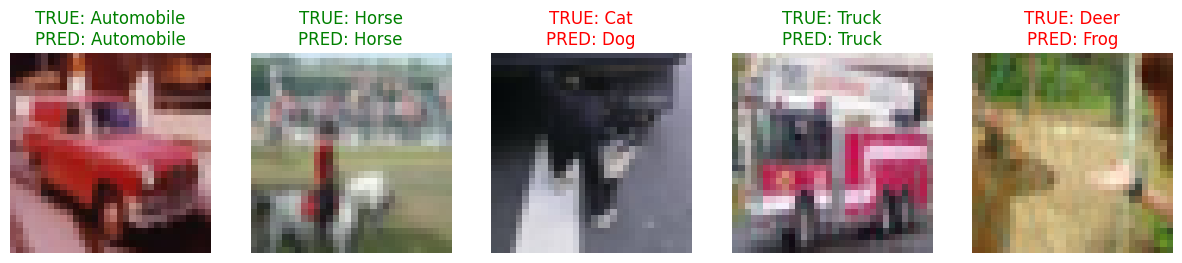

In [40]:
class_labels = ["Airplane", "Automobile", "Bird", "Cat", "Deer", "Dog", "Frog", "Horse", "Ship", "Truck"]
random_indices = np.random.randint(0, len(x_test), size=5)
predictions = model.predict(x_test[random_indices])
fig, axes = plt.subplots(1, 5, figsize=(15, 10))

for i, idx in enumerate(random_indices):
    axes[i].imshow(x_test[idx])

    predicted_label = class_labels[np.argmax(predictions[i])]
    
    true_label = class_labels[np.argmax(y_test[idx])]  

    axes[i].set_title(f"TRUE: {true_label}\nPRED: {predicted_label}", 
                      color=("green" if true_label == predicted_label else "red"))
    
    axes[i].axis("off") 

plt.show()
